import LIB


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

Path ke dataset

In [3]:
train_dir = 'D:/ADSA/KULIAH/SEMESTER 4/KECERDASAN BUATAN/Kecerdasan Buatan Klasifikasi Hewan Bagi Anak'


Pra-pemrosesan data

In [4]:

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) 

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    subset='training' 
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    subset='validation' 
)

Found 791 images belonging to 3 classes.
Found 196 images belonging to 3 classes.


 model CNN

In [5]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')  
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


c:\Users\agusa\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Melatih Model CNN


In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8468 - loss: 0.3917 - val_accuracy: 0.3667 - val_loss: 1.4194
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8000 - loss: 0.4398 - val_accuracy: 0.3750 - val_loss: 1.3528
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.8570 - loss: 0.3756 - val_accuracy: 0.4333 - val_loss: 1.3893
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8000 - loss: 0.4718 - val_accuracy: 0.2500 - val_loss: 1.3680
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.8728 - loss: 0.3423 - val_accuracy: 0.3667 - val_loss: 1.5548
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8000 - loss: 0.3495 - val_accuracy: 0.5625 - val_loss: 1.3825
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.8848 - loss: 0.3095 - val_accuracy: 0.4278 - val_loss: 1.4765
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8000 - loss: 0.4958 - val_accuracy: 0.5000 - val_lo

Grafik

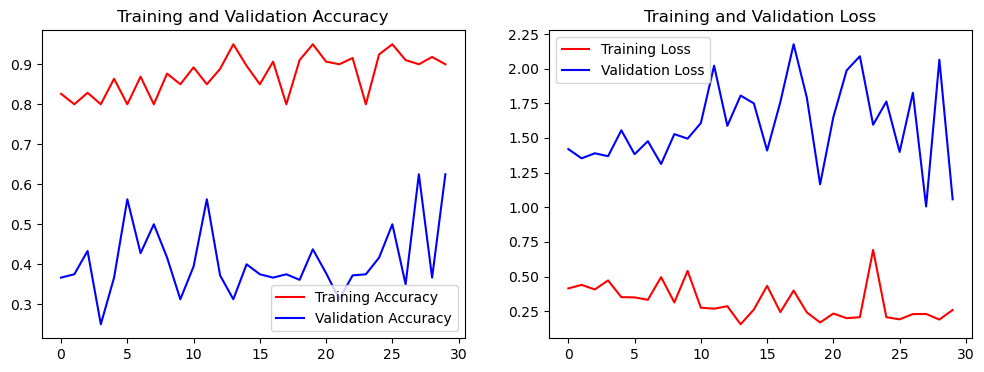

In [10]:
import matplotlib.pyplot as plt


# Menampilkan Grafik Akurasi dan Loss
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    
    plt.show()

plot_history(history)


Evaluasi Model

In [9]:
# Evaluasi model
eval_result = model.evaluate(validation_generator)
print(f"\nTest accuracy: {eval_result[1]*100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 718ms/step - accuracy: 0.3764 - loss: 1.9956

Test accuracy: 38.78%
